## 1. Plot 10 samples, spaced uniformly in range [0, 1], with the function sin(2πx) with a Gaussian noise like below.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi, sin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [2]:
%matplotlib inline

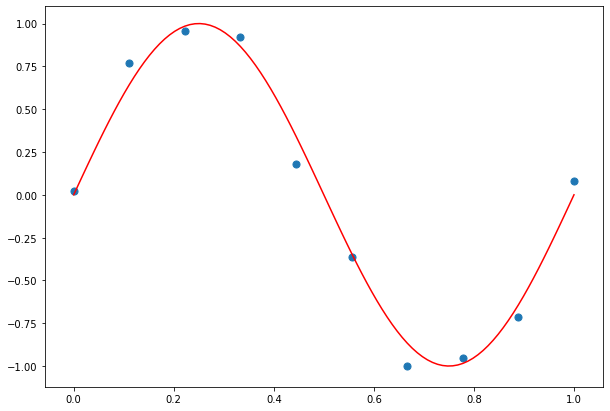

In [3]:
x = np.linspace(0,1,100)
noise = np.random.normal(0, 0.1, 10)
dot = np.linspace(0,1,10)
plt.figure(figsize=(10, 7))
plt.plot(x, np.sin(2*pi*x), color = 'red')
plt.scatter(dot, np.sin(2*pi*dot) + noise, s = 50)

Anaylsis : Plotting a 10 samples following Gaussian noise from 0 to 0.1.

## 2. Generate regression lines with polynomial basis function with order 1, 3, 5, and 9.

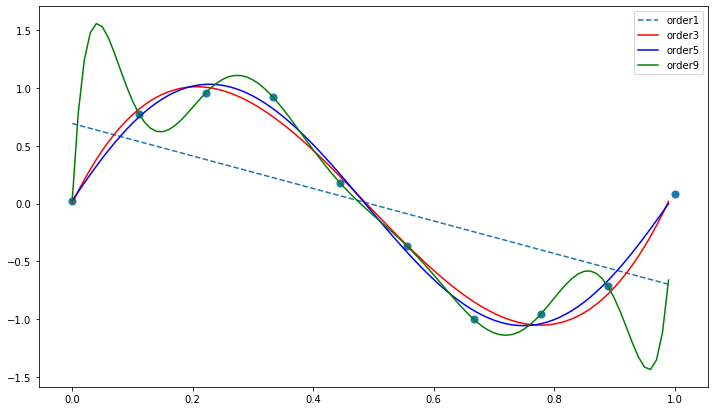

MSE = Order1 : 0.29453021896228837, Order3 : 0.0076301517239474965, Order5 : 0.003871346997716848, Order9 : 1.435106610317998e-21


In [4]:
x1 = dot[:, np.newaxis]
y = np.sin(2*pi*dot) + noise

order_3 = PolynomialFeatures(degree=3)
x_o3 = order_3.fit_transform(x1)
order_5 = PolynomialFeatures(degree=5)
x_o5 = order_5.fit_transform(x1)
order_9 = PolynomialFeatures(degree=9)
x_o9 = order_9.fit_transform(x1)

o1 = LinearRegression()
o3 = LinearRegression()
o5 = LinearRegression()
o9 = LinearRegression()

x_fit = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]

o1.fit(x1, y)
y_o1_fit = o1.predict(x_fit)

o3.fit(x_o3, y)
y_o3_fit = o3.predict(order_3.fit_transform(x_fit))

o5.fit(x_o5, y)
y_o5_fit = o5.predict(order_5.fit_transform(x_fit))

o9.fit(x_o9, y)
y_o9_fit = o9.predict(order_9.fit_transform(x_fit))

y_o1_pred = o1.predict(x1)
y_o3_pred = o3.predict(x_o3)
y_o5_pred = o5.predict(x_o5)
y_o9_pred = o9.predict(x_o9)

mse_o1 = mean_squared_error(y, y_o1_pred)
mse_o3 = mean_squared_error(y, y_o3_pred)
mse_o5 = mean_squared_error(y, y_o5_pred)
mse_o9 = mean_squared_error(y, y_o9_pred)

plt.figure(figsize=(12, 7))
plt.scatter(dot, np.sin(2*pi*dot) + noise, s = 50)
plt.plot(x_fit, y_o1_fit, linestyle = '--', label = 'order1')
plt.plot(x_fit, y_o3_fit, color = 'red', label = 'order3')
plt.plot(x_fit, y_o5_fit, color = 'blue', label = 'order5')
plt.plot(x_fit, y_o9_fit, color = 'green', label = 'order9')
plt.legend()
plt.show()

print('MSE = Order1 : {}, Order3 : {}, Order5 : {}, Order9 : {}'.format(mse_o1, mse_o3, mse_o5, mse_o9))

Anaylsis : The 1, 3, 5, 9th polynomials were generated using the Scikit-learn library. Due to the insufficient number of samples, there is a tendency to overfitting as the order increases.
Also, the number of sample is so small that make a lot of noise.
As the degree of polynomial increases, the MSE value decreases.

## 3. Add 2 or 3 points of exceptional outliers that do not follow sin(2πx) and then generate regression lines with polynomial basis function with order 1, 3, 5, and 9.

In [5]:
print(dot)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


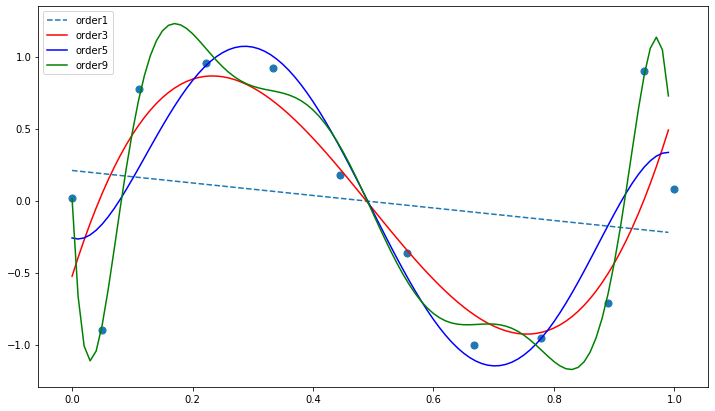

MSE = Order1 : 0.5249480791834181, Order3 : 0.20821955701308037, Order5 : 0.1484745348394638, Order9 : 0.01193657330541973


In [6]:
#Add eceptional outliers
y = np.sin(2*pi*dot) + noise
dot = np.append(dot, np.array([0.05, 0.95]))
y = np.append(y, np.array([-0.9, 0.9]))
x1 = dot[:, np.newaxis]

order_3 = PolynomialFeatures(degree=3)
x_o3 = order_3.fit_transform(x1)
order_5 = PolynomialFeatures(degree=5)
x_o5 = order_5.fit_transform(x1)
order_9 = PolynomialFeatures(degree=9)
x_o9 = order_9.fit_transform(x1)

o1 = LinearRegression()
o3 = LinearRegression()
o5 = LinearRegression()
o9 = LinearRegression()

x_fit = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]

o1.fit(x1, y)
y_o1_fit = o1.predict(x_fit)

o3.fit(x_o3, y)
y_o3_fit = o3.predict(order_3.fit_transform(x_fit))

o5.fit(x_o5, y)
y_o5_fit = o5.predict(order_5.fit_transform(x_fit))

o9.fit(x_o9, y)
y_o9_fit = o9.predict(order_9.fit_transform(x_fit))

y_o1_pred = o1.predict(x1)
y_o3_pred = o3.predict(x_o3)
y_o5_pred = o5.predict(x_o5)
y_o9_pred = o9.predict(x_o9)

mse_o1 = mean_squared_error(y, y_o1_pred)
mse_o3 = mean_squared_error(y, y_o3_pred)
mse_o5 = mean_squared_error(y, y_o5_pred)
mse_o9 = mean_squared_error(y, y_o9_pred)

plt.figure(figsize=(12, 7))
plt.scatter(dot, y, s = 50)
plt.plot(x_fit, y_o1_fit, linestyle = '--', label = 'order1')
plt.plot(x_fit, y_o3_fit, color = 'red', label = 'order3')
plt.plot(x_fit, y_o5_fit, color = 'blue', label = 'order5')
plt.plot(x_fit, y_o9_fit, color = 'green', label = 'order9')
plt.legend()
plt.show()

print('MSE = Order1 : {}, Order3 : {}, Order5 : {}, Order9 : {}'.format(mse_o1, mse_o3, mse_o5, mse_o9))

Analysis : When an exceptional sample is added, the loss value is larger than before, but there is a tendency to overfitting as the order increases.
In other words, the more complex the model, the better the training data is applied, but the risk of overfitting is high.

## 4. Generate the regression lines with a quadratic regularization term with order 1, 3, 5, and 9. Show how the lines are change with respect to λ. 

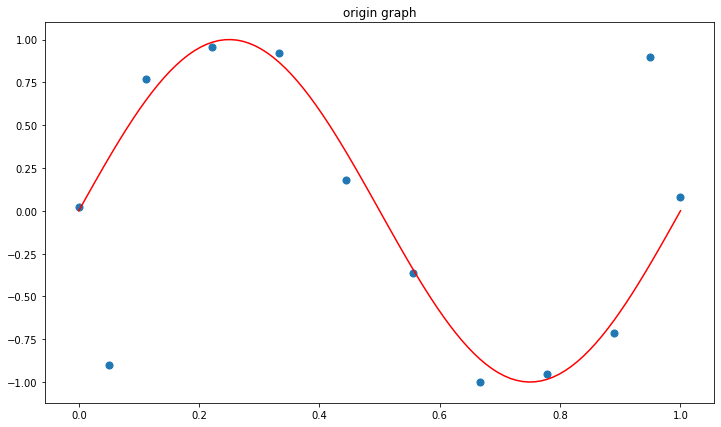

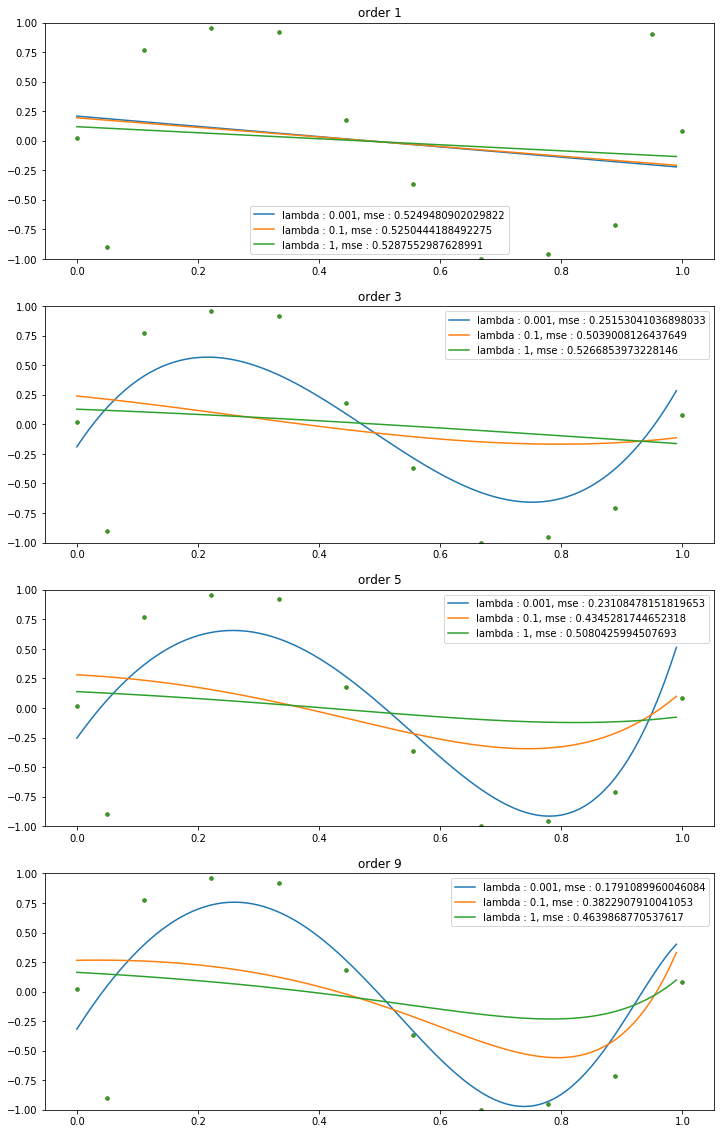

In [7]:
# make a origin graph
x = np.linspace(0,1,100)
plt.figure(figsize=(12, 7))
plt.plot(x, np.sin(2*pi*x), color = 'red')
plt.scatter(dot, y, s = 50)
plt.title('origin graph')
plt.show()

x_fit = np.arange(x.min(), x.max(), 0.01)

def ridge(a, n):
    model = Ridge(a).fit(np.vander(dot, n+1), y)
    y_pred = model.predict(np.vander(x_fit, n+1))
    y_dot = model.predict(np.vander(dot, n+1))
    mse = mean_squared_error(y, y_dot)
    plt.scatter(dot, y, s = 10)
    plt.plot(x_fit, y_pred, label = 'lambda : {}, mse : {}'.format(a, mse))
    plt.ylim(-1, 1)
    plt.legend()

plt.figure(figsize=(12,20))
plt.subplot(411)
plt.title('order 1')
ridge(0.001, 1)
ridge(0.1, 1)
ridge(1, 1)

plt.subplot(412)
plt.title('order 3')
ridge(0.001, 3)
ridge(0.1, 3)
ridge(1, 3)

plt.subplot(413)
plt.title('order 5')
ridge(0.001, 5)
ridge(0.1, 5)
ridge(1,5)

plt.subplot(414)
plt.title('order 9')
ridge(0.001, 9)
ridge(0.1, 9)
ridge(1, 9)


Analysis : If the lambda increases, the loss increases. As the order increased, the loss decreased.
In other words, to resolve overfitting and to regularize it, you need to decrease the order or increase the lambda.

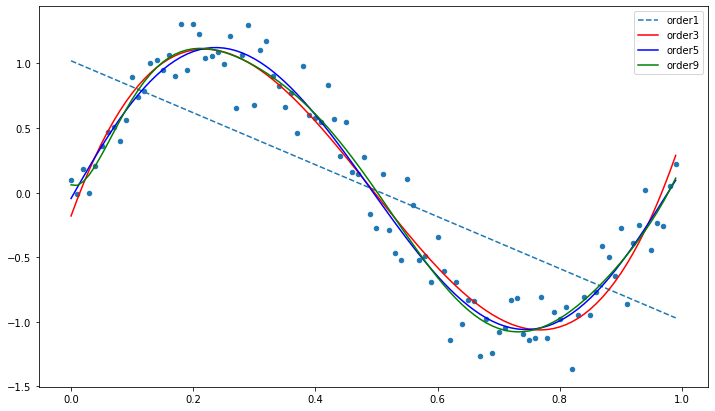

MSE = Order1 : 0.28005074595749774, Order3 : 0.03656441881448889, Order5 : 0.03316707511942218, Order9 : 0.03197278785269494


In [15]:
noise = np.random.normal(0, 0.2, 100)
x_fit = np.arange(x.min(), x.max(), 0.01)
x_1 = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]
y = np.sin(2*pi*x_fit) + noise

order_1 = PolynomialFeatures(degree=1)
x_o1 = order_1.fit_transform(x_1)
order_3 = PolynomialFeatures(degree=3)
x_o3 = order_3.fit_transform(x_1)
order_5 = PolynomialFeatures(degree=5)
x_o5 = order_5.fit_transform(x_1)
order_9 = PolynomialFeatures(degree=9)
x_o9 = order_9.fit_transform(x_1)

o1 = LinearRegression()
o3 = LinearRegression()
o5 = LinearRegression()
o9 = LinearRegression()

x_fit = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]

o1.fit(x_o1, y)
y_o1_fit = o1.predict(order_1.fit_transform(x_fit))

o3.fit(x_o3, y)
y_o3_fit = o3.predict(order_3.fit_transform(x_fit))

o5.fit(x_o5, y)
y_o5_fit = o5.predict(order_5.fit_transform(x_fit))

o9.fit(x_o9, y)
y_o9_fit = o9.predict(order_9.fit_transform(x_fit))

y_o1_pred = o1.predict(x_o1)
y_o3_pred = o3.predict(x_o3)
y_o5_pred = o5.predict(x_o5)
y_o9_pred = o9.predict(x_o9)

mse_o1 = mean_squared_error(y, y_o1_pred)
mse_o3 = mean_squared_error(y, y_o3_pred)
mse_o5 = mean_squared_error(y, y_o5_pred)
mse_o9 = mean_squared_error(y, y_o9_pred)

plt.figure(figsize=(12, 7))
plt.scatter(x_fit, y, s = 20)
plt.plot(x_fit, y_o1_fit, linestyle = '--', label = 'order1')
plt.plot(x_fit, y_o3_fit, color = 'red', label = 'order3')
plt.plot(x_fit, y_o5_fit, color = 'blue', label = 'order5')
plt.plot(x_fit, y_o9_fit, color = 'green', label = 'order9')
plt.legend()
plt.show()

print('MSE = Order1 : {}, Order3 : {}, Order5 : {}, Order9 : {}'.format(mse_o1, mse_o3, mse_o5, mse_o9))

Analysis : As the number of samples increases, even if the polynomial order increases, it becomes difficult to fall below a certain MSE. That is, as the number of samples increases, the probability of creating a generalized curve is high.